### What is about Project model?

###### We have dataset on happiness index score based on region, county, economy and health life expectancy. we will create model on mentinoed variable to predict next happiness index score. with help of this model any county can use this model and enter their GDP and Health ( life Expectancy) so they can identify what should be their next happiness index based on those independent variables. if they want ot imporve their ranking in happiness index what should be improvement require in those independent variables that easily tell us our project model.

In [158]:
# import required library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder

### Import Data for leaner regression

In [294]:
# import dataset 
df = pd.read_csv('2015.csv')
df = df.dropna(axis = 1 , how = 'all')

In [295]:
# it shows first five records
df.head()

,Country,Region,Economy (GDP per Capita),Health (Life Expectancy),Happiness Score
0,Switzerland,Western Europe,1.39651,0.94143,7.587
1,Iceland,Western Europe,1.30232,0.94784,7.561
2,Denmark,Western Europe,1.32548,0.87464,7.527
3,Norway,Western Europe,1.45900,0.88521,7.522
4,Canada,North America,1.32629,0.90563,7.427


In [2]:
# it shows relationship between economy gdp vs happiness score
sns.scatterplot(x = df['Economy (GDP per Capita)'], y = df['Happiness Score'], data = df, alpha = 0.6)
plt.title('Relationship between Economy GDP vs Happiness score' )


NameError: name 'sns' is not defined

Text(0.5, 1.0, 'Relationship between Health (life expextancy) vs Happiness score')

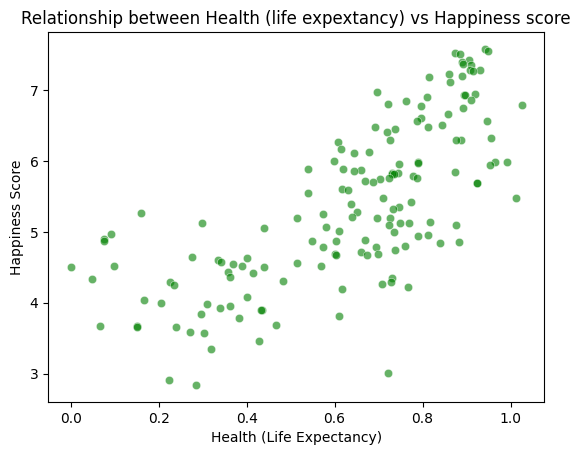

In [297]:
# it shows relationship between health and happiness score 
sns.scatterplot(x = df['Health (Life Expectancy)'], y = df['Happiness Score'], data = df, color = 'Green', alpha = 0.6)
plt.title('Relationship between Health (life expextancy) vs Happiness score' )


### Leaner Regression model on Happiness score depend on Economy's GDP

In [298]:
# Extract series from data frame
x = df.iloc[: , 2]
y = df.iloc[: , 4]

In [299]:
# built leaner regression model using sklearn library and predicted value based on 1.69 GDP
lr = LinearRegression()
lr.fit(np.array(x).reshape(-1,1),y)
array = np.array([[1.69]])
lr.predict(array)

array([7.24761349])

In [300]:
# it tell us coeffiecent of model
lr.coef_

array([2.21822712])

In [301]:
# it tell us intercept of model
lr.intercept_

3.4988096598243628

In [302]:
# it tell us how efficent our model is
lr.score(np.array(x).reshape(-1,1),y)

0.6099071541531225

In [303]:
# prediction of Happiness index
y_pred = lr.predict(df[['Economy (GDP per Capita)']])

C:\Users\kenil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [304]:
# calculate residual values for leaner regression model
residual = y - y_pred

C:\Users\kenil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Text(0.5, 1.0, 'leaner regression model on Economy GDP vs Happiness Score')

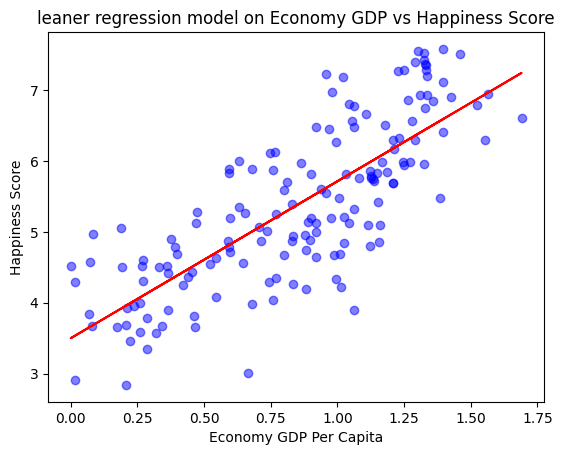

In [305]:
# it shows us leaner regression model 
plt.scatter(x = df['Economy (GDP per Capita)'], y = df['Happiness Score'], color = 'blue', alpha = 0.5)
plt.plot(df['Economy (GDP per Capita)'],lr.predict(df[['Economy (GDP per Capita)']]), color = 'red', label='Predicted')
plt.xlabel('Economy GDP Per Capita')
plt.ylabel('Happiness Score')
plt.title('leaner regression model on Economy GDP vs Happiness Score')

Text(0.5, 1.0, 'Residual plot for Happiness score')

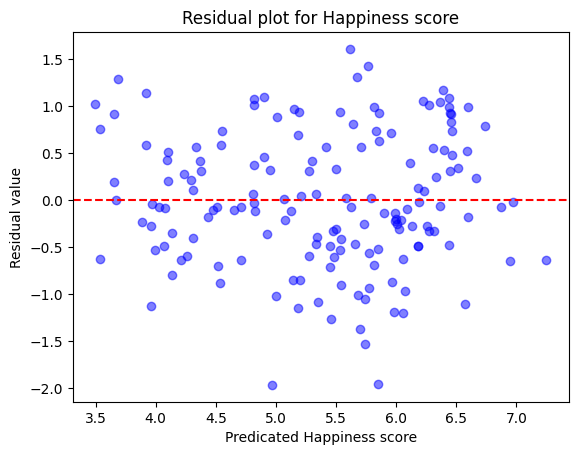

In [306]:
# it shows us leaner regression model 
plt.scatter(x = y_pred, y = residual, color = 'blue', alpha = 0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicated Happiness score')
plt.ylabel('Residual value')
plt.title('Residual plot for Happiness score')

In [307]:
# Multipal leaner regression model
lr.fit(df[['Economy (GDP per Capita)', 'Health (Life Expectancy)']], y)
lr.predict([[1.69, 0.94]])

C:\Users\kenil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.11218039])

In [308]:
# coefficent of multipal leaner regression
lr.coef_

array([1.61607018, 1.20328007])

In [309]:
# intercept of multipal leaner regression
lr.intercept_

3.24993852016978

In [310]:
# it tell us how effcient our model is
lr.score(df[['Economy (GDP per Capita)', 'Health (Life Expectancy)']], y)

0.6323821895362342

In [311]:
# Predicted value of Happiness score based on GDP and Health
y_pred1 = lr.predict(df[['Economy (GDP per Capita)', 'Health (Life Expectancy)']])

In [312]:
# Calculate Residual value for leanier regression model
residual1 = y - y_pred1

Text(0.5, 1.0, 'Residual plot for Happiness score')

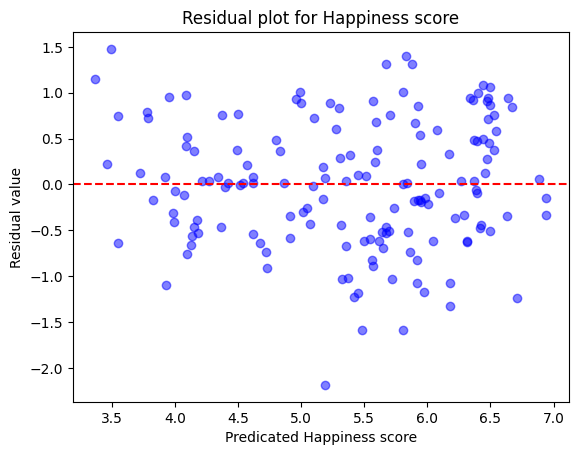

In [313]:
# it shows residual value based on multipal leaner regression
plt.scatter(x = y_pred1, y = residual1, color = 'blue', alpha = 0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicated Happiness score')
plt.ylabel('Residual value')
plt.title('Residual plot for Happiness score')

In [316]:
# making dummy variable for imporv R square
dummy = pd.get_dummies(df.Region)

In [318]:
# merge two dataframe
merge = pd.concat([df,dummy], axis = 1)

In [333]:
# make final dataframe by droping Region colunm for multipal leaner regression modal
mdf = merge.drop(['Region','Western Europe'] , axis = 1)

In [334]:
# first five record
mdf.head()

,Country,Economy (GDP per Capita),Health (Life Expectancy),Happiness Score,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa
0,Switzerland,1.39651,0.94143,7.587,0,0,0,0,0,0,0,0,0
1,Iceland,1.30232,0.94784,7.561,0,0,0,0,0,0,0,0,0
2,Denmark,1.32548,0.87464,7.527,0,0,0,0,0,0,0,0,0
3,Norway,1.45900,0.88521,7.522,0,0,0,0,0,0,0,0,0
4,Canada,1.32629,0.90563,7.427,0,0,0,0,0,1,0,0,0


In [350]:
# manuplating Y variable and X variable for leaner regression model
y = mdf.iloc[:, 3]
X = mdf.drop(['Country', 'Happiness Score'], axis = 1)

In [352]:
# creating multipal leaner regression modal
lr.fit(X, y)
lr.predict([[1.69,0.95,0,0,0,0,0,1,0,0,0]])

C:\Users\kenil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.84612296])

In [353]:
# it shows coefficent of leaner regression modal
lr.coef_

array([ 1.6360829 ,  0.51093737,  0.60084166, -0.67671557, -0.80702245,
        0.25001426, -0.79977349,  0.49526129, -0.42009194, -0.71296527,
       -0.66443028])

In [354]:
# it shows intercept of leaner regression modal
lr.intercept_

4.100491066101726

In [355]:
# R square how efficent leaner regression modal is?
lr.score(X, y)

0.7380748037817021

In [356]:
# it shows pradicated value for happiness index keep in considering categories
y_pred2 = lr.predict(X)

In [357]:
# it shows residual value for leaner regression mdoal
residual2 = y - y_pred2

Text(0.5, 1.0, 'Residual plot for Happiness score')

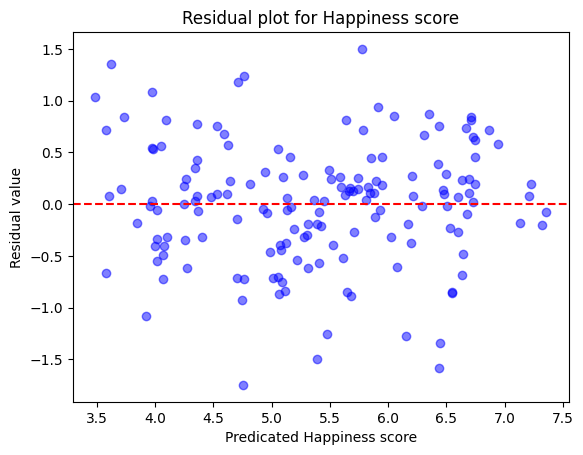

In [358]:
# it shows residual plot
plt.scatter(x = y_pred2, y = residual2, color = 'blue', alpha = 0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicated Happiness score')
plt.ylabel('Residual value')
plt.title('Residual plot for Happiness score')